In [1]:
# data preprocessing
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
x_train = train.iloc[ :, :-1].values
y_train = train.iloc[:, -1]


In [3]:
train.isnull().values.any()


False

In [4]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)


In [5]:
# encoding categorical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)


In [6]:
# implementing random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='gini', max_features=100, random_state=0)
classifier.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=100, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [7]:
# test data
# importing
test = pd.read_csv('test.csv')
x_test = test.iloc[ :, :-1].values
y_test = test.iloc[:, -1]


In [8]:
test.isnull().values.any()


False

In [9]:
# feature scaling
x_test = sc_x.fit_transform(x_test)


In [10]:
# encoding categorical values
y_test = le.fit_transform(y_test)


In [11]:
# predicting the result
y_pred = classifier.predict(x_test)


In [12]:
# checking accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[537,   0,   0,   0,   0,   0],
       [  0, 466,  25,   0,   0,   0],
       [  0, 384, 148,   0,   0,   0],
       [  0,   0,   0, 462,  26,   8],
       [  0,   0,   0,   5, 387,  28],
       [  0,   0,   0,  46,  46, 379]])

In [13]:
# k-fold cross validation score
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv=10)
print("mean of the accuracies is ",accuracies.mean())
print("standard deviation of amodel is", accuracies.std())


mean of the accuracies is  0.906344676274
standard deviation of amodel is 0.0433726674249


In [15]:
# checking accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy*100

80.726162198846282

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin

In [21]:
x = np.arange(1, 100)
y = [sin(a) for a in x]

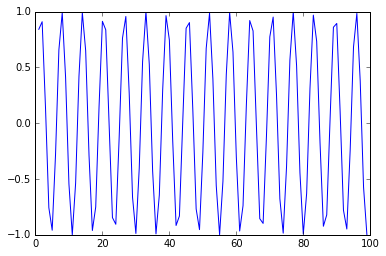

In [22]:
plt.plot(x,y)